<a href="https://colab.research.google.com/github/nikhilraju0904/My-projects/blob/main/stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/data set/stroke.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

In [ ]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
df['gender']=df['gender'].map({'Male':0,'Female':1,'Other':2})
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,1,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,0,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,1,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,1,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,1,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,1,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,0,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [ ]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [ ]:
df['ever_married']=df['ever_married'].map({'Yes':1,'No':0})
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,1,61.0,0,0,1,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,0,80.0,0,1,1,Private,Rural,105.92,32.500000,never smoked,1
3,60182,1,49.0,0,0,1,Private,Urban,171.23,34.400000,smokes,1
4,1665,1,79.0,1,0,1,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,1,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,1,81.0,0,0,1,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,1,35.0,0,0,1,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,0,51.0,0,0,1,Private,Rural,166.29,25.600000,formerly smoked,0


In [ ]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [ ]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()
df['work_type']=le1.fit_transform(df['work_type'])
df['Residence_type']=le2.fit_transform(df['Residence_type'])
df['smoking_status']=le3.fit_transform(df['smoking_status'])

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,1,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,0,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,1,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,1,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,44873,1,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,19723,1,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,37544,0,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [ ]:
df['smoking_status'].unique()

array([1, 2, 3, 0])

In [ ]:
df.dtypes

id                     int64
gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

In [ ]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.drop(['id'],axis=1,inplace=True)

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,1,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,0,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,1,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,1,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,1,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,0,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [ ]:
X=df.iloc[:,:-1]
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,67.0,0,1,1,2,1,228.69,36.600000,1
1,1,61.0,0,0,1,3,0,202.21,28.893237,2
2,0,80.0,0,1,1,2,0,105.92,32.500000,2
3,1,49.0,0,0,1,2,1,171.23,34.400000,3
4,1,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,2,1,83.75,28.893237,2
5106,1,81.0,0,0,1,3,1,125.20,40.000000,2
5107,1,35.0,0,0,1,3,0,82.99,30.600000,2
5108,0,51.0,0,0,1,2,0,166.29,25.600000,1


In [ ]:
y=df.iloc[:,-1]
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled



array([[0.        , 0.81689453, 0.        , ..., 0.80126489, 0.30126002,
        0.33333333],
       [0.5       , 0.74365234, 0.        , ..., 0.67902317, 0.21298095,
        0.66666667],
       [0.        , 0.97558594, 0.        , ..., 0.23451205, 0.25429553,
        0.66666667],
       ...,
       [0.5       , 0.42626953, 0.        , ..., 0.12865848, 0.2325315 ,
        0.66666667],
       [0.        , 0.62158203, 0.        , ..., 0.51320284, 0.17525773,
        0.33333333],
       [0.5       , 0.53613281, 0.        , ..., 0.13922999, 0.18213058,
        0.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=5)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test.values

array([0, 0, 0, ..., 0, 0, 0])

ACCURACY: 95.04240052185257


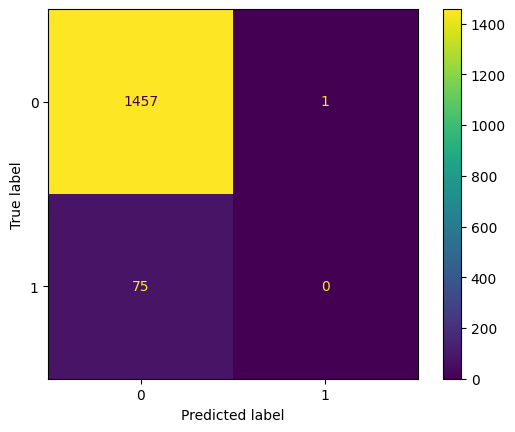

In [ ]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
print("ACCURACY:",accuracy_score(y_test,y_pred)*100)
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
# 2--- SVC
from sklearn.svm import SVC
sv=SVC(kernel='poly')
sv.fit(X_train,y_train)

SVC(kernel='poly')

In [ ]:
y_pred=sv.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



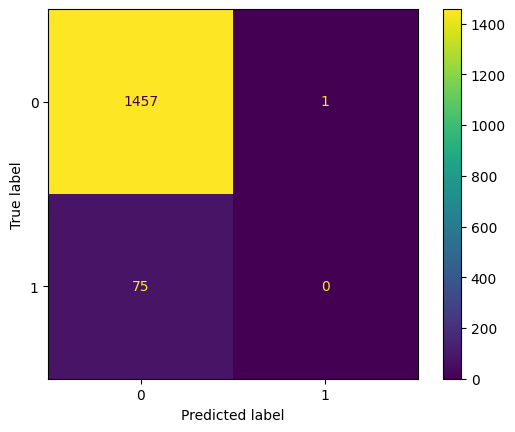

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))



In [ ]:
print(accuracy_score(y_test,y_pred)*100)

95.04240052185257


In [ ]:
y.value_counts()

0    4861
1     249
Name: stroke, dtype: int64